In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
input_shape = (28,28,1) 

In [3]:

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:

x_train = x_train/255
x_test = x_test/255

print('shape of training :',x_train.shape)

shape of training : (60000, 28, 28, 1)


In [5]:
print('shape of testing :',x_test.shape)

shape of testing : (10000, 28, 28, 1)


In [6]:

model = Sequential() 
model.add(Conv2D(28, kernel_size=(3,3),input_shape=input_shape))


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.3))            
model.add(Dense(10,activation='softmax'))

model.summary()

C:\Users\sarit\Downloads\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 26, 26, 28)    │          280 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 13, 13, 28)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 4732)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 200)           │      946,600 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 200)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │        2,010 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8947 - loss: 0.3392
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9731 - loss: 0.0856


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss=%.3f' %test_loss)
print('Accuracy=%.3f' %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0762
loss=0.063
Accuracy=0.980


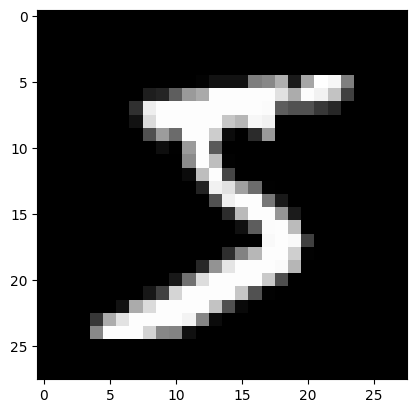

In [9]:

image = x_train[0]
plt.imshow(np.squeeze(image),cmap='gray') 
plt.show()

In [10]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model = model.predict([image])
print('predicted class: {}'.format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
predicted class: 5


C:\Users\sarit\Downloads\venv\lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 28, 28, 1))',)
  warnings.warn(msg)
